In [37]:
import numpy as np
import pandas as pd

In [38]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [39]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
df.shape

(5572, 5)

# Steps taken:
1. Data Cleaning
2) EDA (Exploratory Data Analysis)
3) Text Pre-processing (i.e; Vectorization, stemming, etc.)
4) Model Building
5) Evaluation
6) Improvements depending on evaluation
7) Converting to Website
8) Deploying Website on Heroku

# 1. Data Cleaning

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [42]:
# Drop last 3 columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [43]:
df.sample(5)

,v1,v2
731,ham,No he didn't. Spring is coming early yay!
1827,ham,Hey gorgeous man. My work mobile number is. Ha...
3287,spam,Someone U know has asked our dating service 2 ...
1412,ham,"Wen ur lovable bcums angry wid u, dnt take it ..."
579,ham,Arngd marriage is while u r walkin unfortuntly...


In [44]:
# renaming columns
df.rename(columns = {'v1':'target', 'v2': 'text'}, inplace = True)
df.sample(5)

,target,text
1963,ham,Yes :)it completely in out of form:)clark also...
5156,ham,"Sir, I need Velusamy sir's date of birth and c..."
3594,ham,Huh but i cant go 2 ur house empty handed right?
5039,spam,Natalie (20/F) is inviting you to be her frien...
1502,ham,Don no da:)whats you plan?


In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [46]:
df['target'] = encoder.fit_transform(df['target'])  # assigns 0 to ham and 1 to spam

In [47]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
# finding missing values:
df.isnull().sum()

target    0
text      0
dtype: int64

In [49]:
# check for duplicate values:
df.duplicated().sum()

403

In [50]:
# removing duplicates:
df = df.drop_duplicates(keep = 'first')

In [51]:
df.duplicated().sum()

0

In [52]:
df.shape

(5169, 2)

# 2. EDA ( Exploratory Data Analysis)

In [53]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

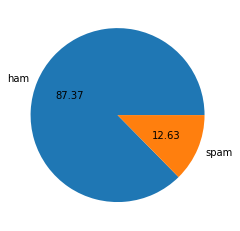

In [55]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [56]:
# Data is Inbalanced

In [57]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/vidit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
df['num_characters'] = df['text'].apply(len)  # getting length of characters

In [60]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [61]:
# getting the number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [62]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [63]:
# getting the number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [64]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [65]:
df[['num_characters', 'num_characters', 'num_sentences']].describe()

,num_characters,num_characters,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,78.977945,1.961308
std,58.236293,58.236293,1.432583
min,2.000000,2.000000,1.000000
25%,36.000000,36.000000,1.000000
50%,60.000000,60.000000,1.000000
75%,117.000000,117.000000,2.000000
max,910.000000,910.000000,38.000000


In [66]:
# ham messages:
df[df['target'] == 0][['num_characters', 'num_characters', 'num_sentences']].describe()

,num_characters,num_characters,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,70.459256,1.815545
std,56.358207,56.358207,1.364098
min,2.000000,2.000000,1.000000
25%,34.000000,34.000000,1.000000
50%,52.000000,52.000000,1.000000
75%,90.000000,90.000000,2.000000
max,910.000000,910.000000,38.000000


In [67]:
# spam messages:
df[df['target'] == 1][['num_characters', 'num_characters', 'num_sentences']].describe()

,num_characters,num_characters,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,137.891271,2.969372
std,30.137753,30.137753,1.488910
min,13.000000,13.000000,1.000000
25%,132.000000,132.000000,2.000000
50%,149.000000,149.000000,3.000000
75%,157.000000,157.000000,4.000000
max,224.000000,224.000000,9.000000


In [68]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

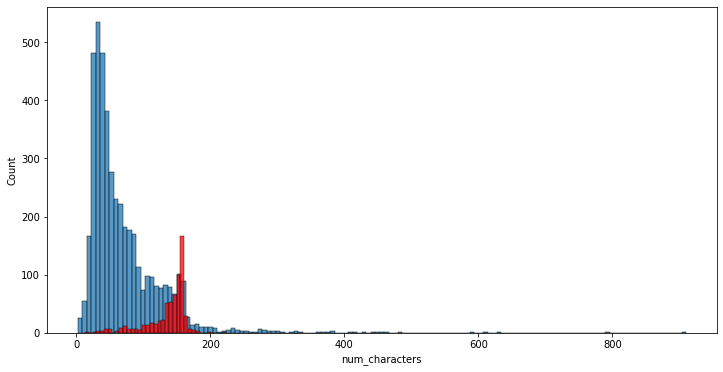

In [69]:
plt.figure(figsize = (12, 6))  # setting graph size
sns.histplot(df[df['target'] == 0]['num_characters'])  # histogram for ham messages (in blue)
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')  # histogram for spam messages (in red)

<AxesSubplot:xlabel='num_words', ylabel='Count'>

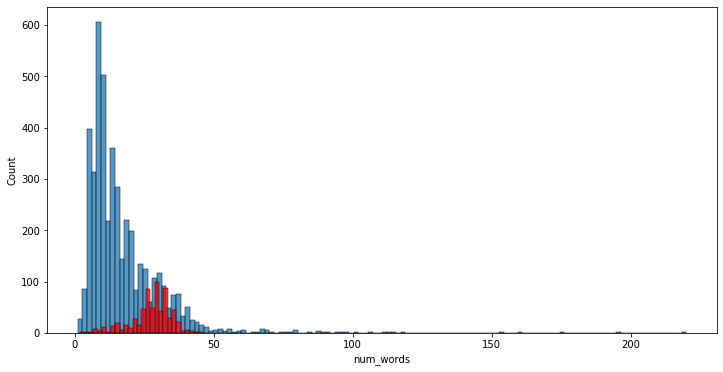

In [70]:
plt.figure(figsize = (12, 6))  # setting graph size
sns.histplot(df[df['target'] == 0]['num_words'])  # histogram for ham messages (in blue)
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')  # histogram for spam messages (in red)

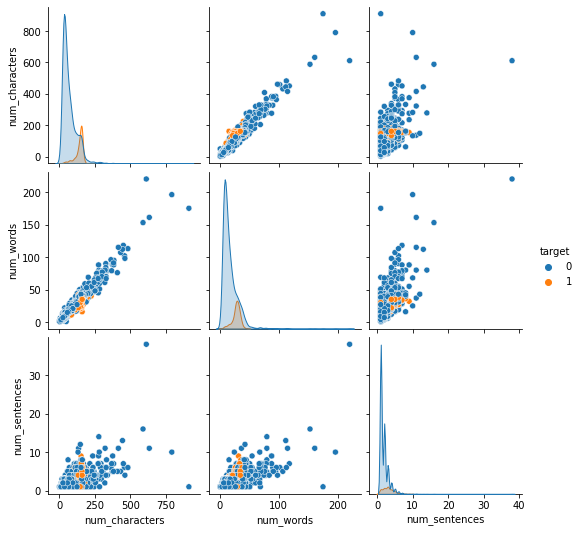

In [71]:
sns.pairplot(df, hue = 'target')

<AxesSubplot:>

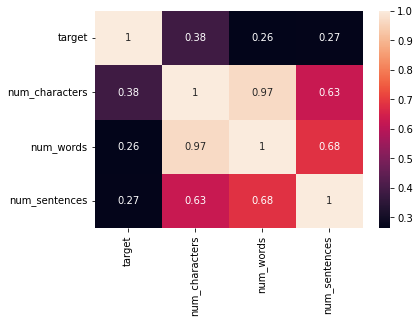

In [72]:
sns.heatmap(df.corr(), annot = True)  # finding correlation

# 3. Data Preprocessing

a) Lower Case

b) Tokenization

c) Removing special characters

d) Removing stop words and punctuation

e) Stemming

In [73]:
from nltk.corpus import stopwords
import string

In [74]:
# function to perform all data preprocessing steps:

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]  
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [77]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('training')

'train'

In [78]:
df['transformed_text'] = df['text'].apply(transform_text)

In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [81]:
# to highlight important words
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [82]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

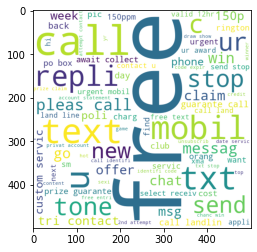

In [83]:
plt.imshow(spam_wc)

In [84]:
ham_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

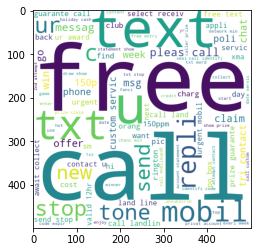

In [85]:
plt.imshow(ham_wc)

In [86]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [87]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [88]:
len(spam_corpus)

9939

In [89]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


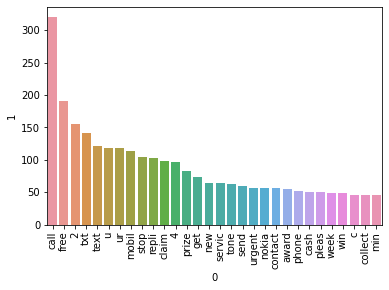

In [90]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [91]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [92]:
len(ham_corpus)

35402

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


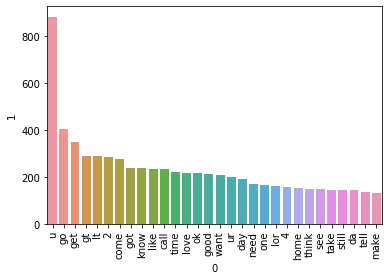

In [93]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model Building

We have to perform text vectorization using 'Bag of Words' method and then insert it into our Naive Bayes Model

In [94]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [95]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [96]:
x.shape

(5169, 3000)

In [97]:
y = df['target'].values

In [98]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [101]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [102]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [103]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [104]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [105]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [106]:
# tfidf --> MNB

In [107]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


# Improving precision score of algorithm by comparing different ML model training methods

In [108]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [125]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty ='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, randomstate = 2)

In [126]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [127]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [128]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [129]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
[06:46:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoo

In [135]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending = False)

In [136]:
performance_df  #Comparing different methods

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [139]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [140]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


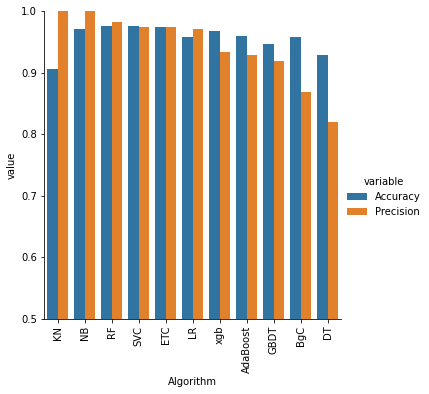

In [143]:
sns.catplot(x = 'Algorithm', y = 'value',
           hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [144]:
import pickle

In [145]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))